In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

# Helps Question 1

In [3]:
B = np.matrix([[4, -2], [-2, 4]])
a = np.matrix([[0], [1]])
b = np.matrix([[-2], [1]])


C = np.matrix([[3, -2], [-2, 3]])
c = np.matrix([[-3 / 5], [-2 / 5]])
c0 = -0.6

<IPython.core.display.Javascript object>

In [4]:
def f1(x):
    x = np.asmatrix(x)
    return (
        x.transpose() * B * x
        - x.transpose() * x
        + a.transpose() * x
        - b.transpose() * x
    )

<IPython.core.display.Javascript object>

In [5]:
def f1_2(x):
    x = np.asmatrix(x)
    return ((x - c).transpose()) * C * (x - c) + c0

<IPython.core.display.Javascript object>

In [6]:
gg = np.asmatrix([[6, -4], [-4, 6]])

<IPython.core.display.Javascript object>

# Question 3

In [7]:
B = np.matrix([[4, -2], [-2, 4]])
a = np.matrix([[0], [1]])
b = np.matrix([[-2], [1]])

C = np.matrix([[3, -2], [-2, 3]])
c = np.matrix([[-3 / 5], [-2 / 5]])
c0 = -0.6
I = np.matrix([[1, 0], [0, 1]])

<IPython.core.display.Javascript object>

In [8]:
def grad_f1(x):
    x = np.asmatrix(x).transpose()
    return (x - c).transpose() * (C.transpose() + C)

<IPython.core.display.Javascript object>

In [9]:
def grad_f2(x):
    x = np.asmatrix(x).transpose()
    return -2 * np.sin((x - b).transpose() * (x - b)) * (x - b).transpose() + (
        x - a
    ).transpose() * (B.transpose() + B)

<IPython.core.display.Javascript object>

In [10]:
def grad_f3(x):
    x = np.asmatrix(x).transpose()
    return -(
        np.exp(-(x - a).transpose() * (x - a)) * (-2 * (x - a).transpose())
        + np.exp(-(x - b).transpose() * B * (x - b))
        * (-(x - b).transpose() * (B + B.transpose()))
        - 1
        / 10
        * (1 / np.linalg.det(1 / 100 * I + x * x.transpose()) * 2 / 100 * x.transpose())
    )

<IPython.core.display.Javascript object>

# Question 4

e is learning rate

In [11]:
def grad_desc(grad, step, start, e):
    mn = start
    record = [np.asmatrix(mn)]
    for _ in range(step):
        mn -= e * grad(mn)
        record.append(np.copy(mn))
    return mn, record

<IPython.core.display.Javascript object>

### Plot for f2

In [12]:
def f2(x):
    x = np.asmatrix(x).transpose()
    return np.cos((x - b).transpose() * (x - b)) + (x - a).transpose() * B * (x - a)

<IPython.core.display.Javascript object>

In [13]:
st = [0.3, 0]
learning_rate = 0.02

gdsesc_2 = grad_desc(grad_f2, 50, st, learning_rate)
last_point = tuple(gdsesc_2[0].tolist()[0])
gdsesc_2 = list(map(lambda l: tuple(l.tolist()[0]), gdsesc_2[1]))

<IPython.core.display.Javascript object>

In [14]:
last_point

(-0.15649567127444797, 0.9262483754040941)

<IPython.core.display.Javascript object>

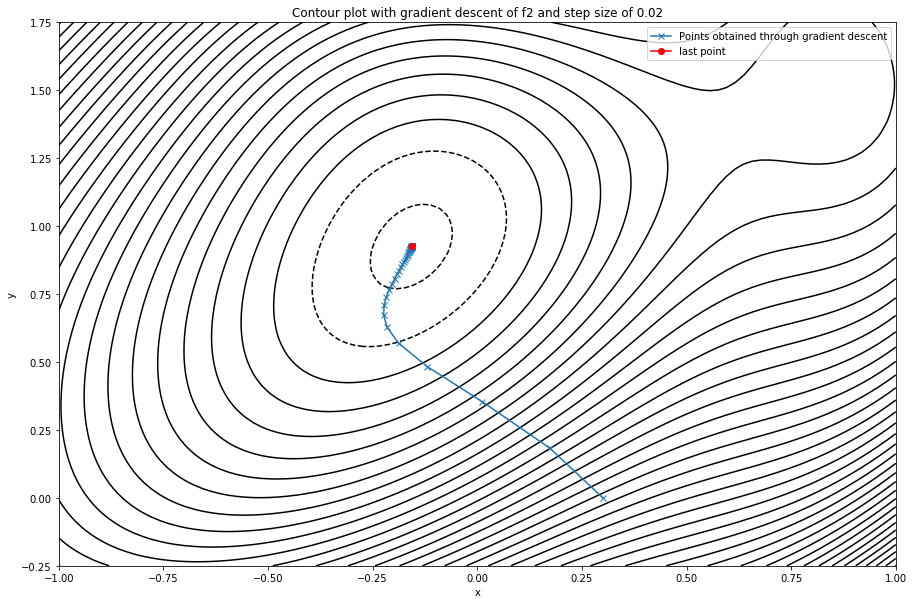

<IPython.core.display.Javascript object>

In [15]:
fig, ax = plt.subplots(figsize=(15, 10))
x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-0.25, 1.75, 100)
X1, X2 = np.meshgrid(x1, x2)

Z = [[[a, b] for a in x1] for b in x2]
results = np.asarray(
    list(map(lambda l: np.asarray(list(map(lambda v: np.double(f2(v)), l))), Z))
)
ax.plot(*zip(*gdsesc_2), marker="x", label="Points obtained through gradient descent")
ax.plot(last_point[0], last_point[1], marker="o", color="red", label="last point")


plt.contour(X1, X2, results, 50, colors="black")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title(
    f"Contour plot with gradient descent of f2 and step size of {learning_rate}"
)
ax.legend()

plt.savefig("./template/grad_f2")
plt.show()

### Plot for f3

In [16]:
def f3(x):
    x = np.asmatrix(x).transpose()
    return 1 - (
        np.exp(-(x - a).transpose() * (x - a))
        + np.exp(-(x - b).transpose() * B * (x - b))
        - 1 / 10 * np.log(np.linalg.det(1 / 100 * I + x * x.transpose()))
    )

<IPython.core.display.Javascript object>

In [17]:
st = [0.3, 0]
learning_rate = 0.07

gdsesc_3 = grad_desc(grad_f3, 50, st, learning_rate)
last_point = tuple(gdsesc_3[0].tolist()[0])
gdsesc_3 = list(map(lambda l: tuple(l.tolist()[0]), gdsesc_3[1]))

<IPython.core.display.Javascript object>

In [19]:
results

array([[ 0.17631337,  0.17020596,  0.16405702, ...,  0.16405702,
         0.17020596,  0.17631337],
       [ 0.16922511,  0.16302225,  0.15677667, ...,  0.15677667,
         0.16302226,  0.16922511],
       [ 0.16214446,  0.15584896,  0.14950973, ...,  0.14950973,
         0.15584897,  0.16214446],
       ...,
       [-0.20017877, -0.20864703, -0.217025  , ..., -0.21687522,
        -0.20847826, -0.19998876],
       [-0.19682356, -0.20526217, -0.21361085, ..., -0.21345089,
        -0.20508201, -0.19662083],
       [-0.19325841, -0.20166538, -0.20998284, ..., -0.2098122 ,
        -0.20147329, -0.19304236]])

<IPython.core.display.Javascript object>

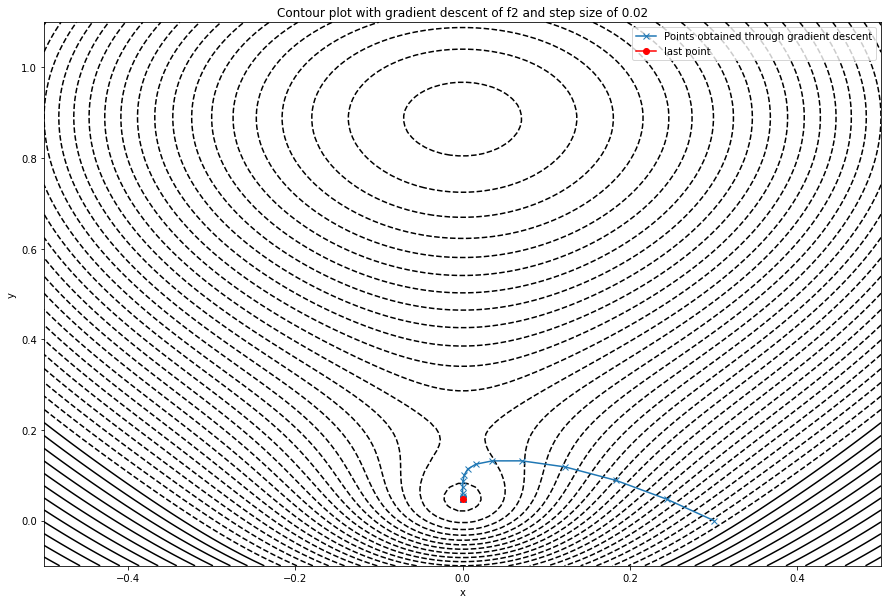

<IPython.core.display.Javascript object>

In [18]:
fig, ax = plt.subplots(figsize=(15, 10))
x1 = np.linspace(-0.5, 0.5, 100)
x2 = np.linspace(-0.1, 1.1, 100)
X1, X2 = np.meshgrid(x1, x2)

Z = [[[a, b] for a in x1] for b in x2]
results = np.asarray(
    list(map(lambda l: np.asarray(list(map(lambda v: np.double(f3(v)), l))), Z))
)
ax.plot(*zip(*gdsesc_3), marker="x", label="Points obtained through gradient descent")
ax.plot(last_point[0], last_point[1], marker="o", color="red", label="last point")

plt.contour(X1, X2, results, 50, colors="black")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Contour plot with gradient descent of f2 and step size of 0.02")
ax.legend()
plt.savefig("./template/grad_f3")
plt.show()

### Question 5

In [84]:
st = [0.3, 0]
learning_rate = 0.001

gdsesc_2 = grad_desc(grad_f2, 50, st, learning_rate)
last_point = tuple(gdsesc_2[0].tolist()[0])
gdsesc_2 = list(map(lambda l: tuple(l.tolist()[0]), gdsesc_2[1]))

<IPython.core.display.Javascript object>

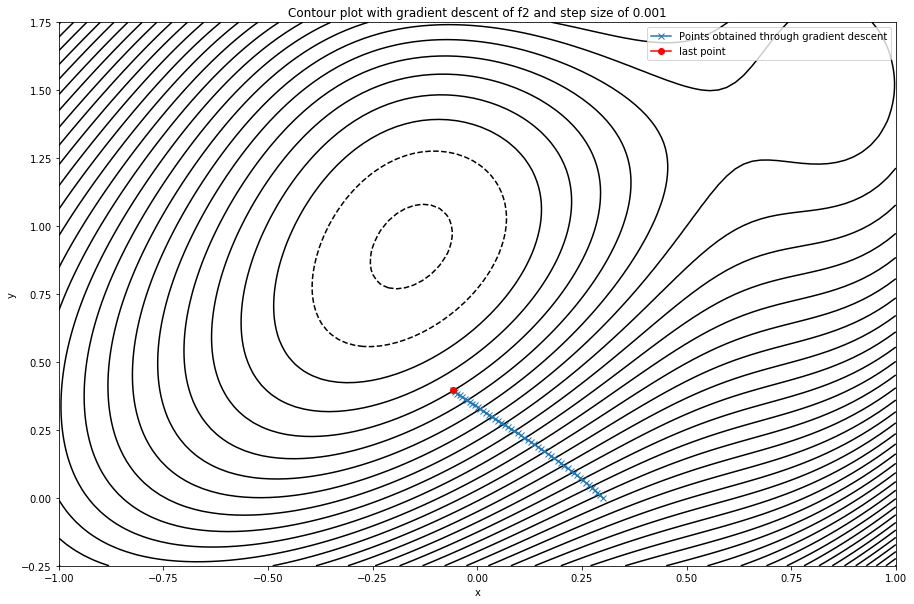

<IPython.core.display.Javascript object>

In [85]:
fig, ax = plt.subplots(figsize=(15, 10))
x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-0.25, 1.75, 100)
X1, X2 = np.meshgrid(x1, x2)

Z = [[[a, b] for a in x1] for b in x2]
results = np.asarray(
    list(map(lambda l: np.asarray(list(map(lambda v: np.double(f2(v)), l))), Z))
)
ax.plot(*zip(*gdsesc_2), marker="x", label="Points obtained through gradient descent")
ax.plot(last_point[0], last_point[1], marker="o", color="red", label="last point")


plt.contour(X1, X2, results, 50, colors="black")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title(
    f"Contour plot with gradient descent of f2 and step size of {learning_rate}"
)
ax.legend()
plt.savefig("./template/grad_f2_court")
plt.show()

In [103]:
st = [0.3, 0]
learning_rate = 0.08

gdsesc_2 = grad_desc(grad_f2, 50, st, learning_rate)
last_point = tuple(gdsesc_2[0].tolist()[0])
gdsesc_2 = list(map(lambda l: tuple(l.tolist()[0]), gdsesc_2[1]))

<IPython.core.display.Javascript object>

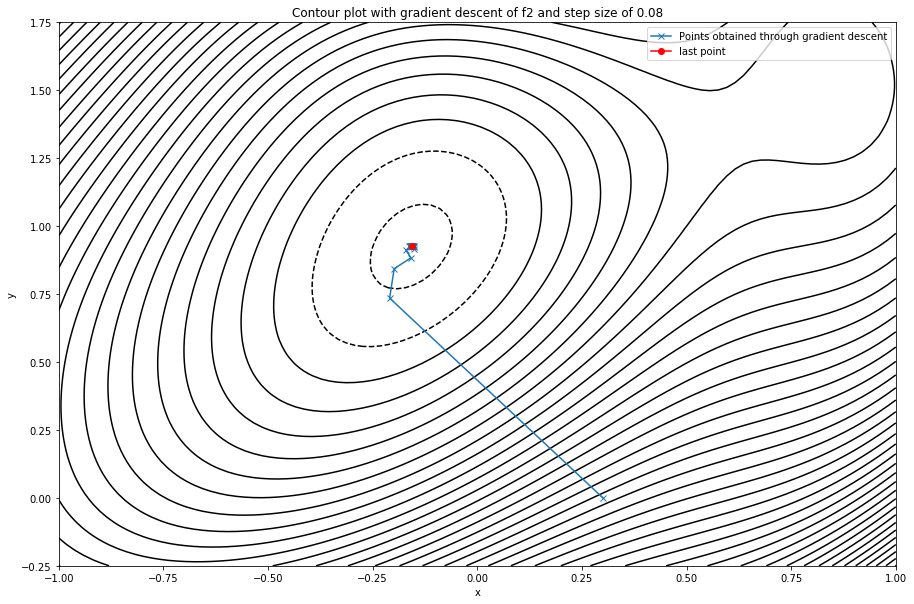

<IPython.core.display.Javascript object>

In [104]:
fig, ax = plt.subplots(figsize=(15, 10))
x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-0.25, 1.75, 100)
X1, X2 = np.meshgrid(x1, x2)

Z = [[[a, b] for a in x1] for b in x2]
results = np.asarray(
    list(map(lambda l: np.asarray(list(map(lambda v: np.double(f2(v)), l))), Z))
)
ax.plot(*zip(*gdsesc_2), marker="x", label="Points obtained through gradient descent")
ax.plot(last_point[0], last_point[1], marker="o", color="red", label="last point")


plt.contour(X1, X2, results, 50, colors="black")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title(
    f"Contour plot with gradient descent of f2 and step size of {learning_rate}"
)
ax.legend()
plt.savefig("./template/grad_f2_ok")
plt.show()

In [89]:
st = [0.3, 0]
learning_rate = 0.1

gdsesc_2 = grad_desc(grad_f2, 50, st, learning_rate)
last_point = tuple(gdsesc_2[0].tolist()[0])
gdsesc_2 = list(map(lambda l: tuple(l.tolist()[0]), gdsesc_2[1]))

<IPython.core.display.Javascript object>

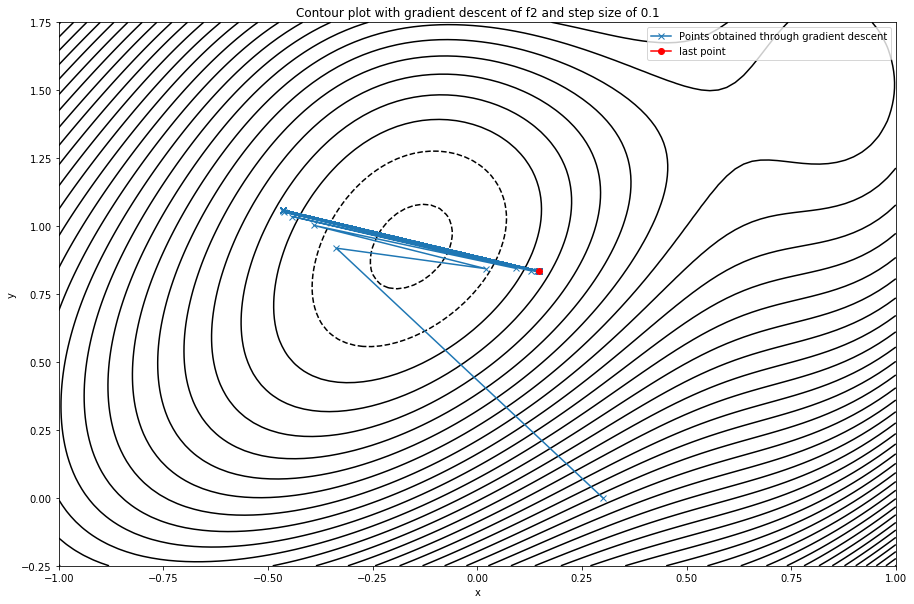

<IPython.core.display.Javascript object>

In [90]:
fig, ax = plt.subplots(figsize=(15, 10))
x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-0.25, 1.75, 100)
X1, X2 = np.meshgrid(x1, x2)

Z = [[[a, b] for a in x1] for b in x2]
results = np.asarray(
    list(map(lambda l: np.asarray(list(map(lambda v: np.double(f2(v)), l))), Z))
)
ax.plot(*zip(*gdsesc_2), marker="x", label="Points obtained through gradient descent")
ax.plot(last_point[0], last_point[1], marker="o", color="red", label="last point")


plt.contour(X1, X2, results, 50, colors="black")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title(
    f"Contour plot with gradient descent of f2 and step size of {learning_rate}"
)
ax.legend()
plt.savefig("./template/grad_f2_gros")
plt.show()

We can see in general that if the step size is too low, then it takes more step to obtain the minimum. (figure 1 and 2 shows it). We can even have the case where we're not even close to the minimum within the 50 iterations (figure 1). <br>
However the more we increase the learning rate, the faster we arrive to the minimum (figure 3) proves it compared to the 2 other ones. So we need less iterations. <br>
However bis, if we push too far, and increase too much the learning, we're never going to find the minimum and it will oscillate around it, while never getting close to it.

However we can see throughout expriences that the best learning (ie the learning rate that will give us the minimum in the least number of steps) is different according to each function. 

### Misclassification

In [110]:
st = [0.3, 0]
learning_rate = 1

gdsesc_2 = grad_desc(grad_f2, 50, st, learning_rate)
last_point = tuple(gdsesc_2[0].tolist()[0])
gdsesc_2 = list(map(lambda l: tuple(l.tolist()[0]), gdsesc_2[1]))

<IPython.core.display.Javascript object>

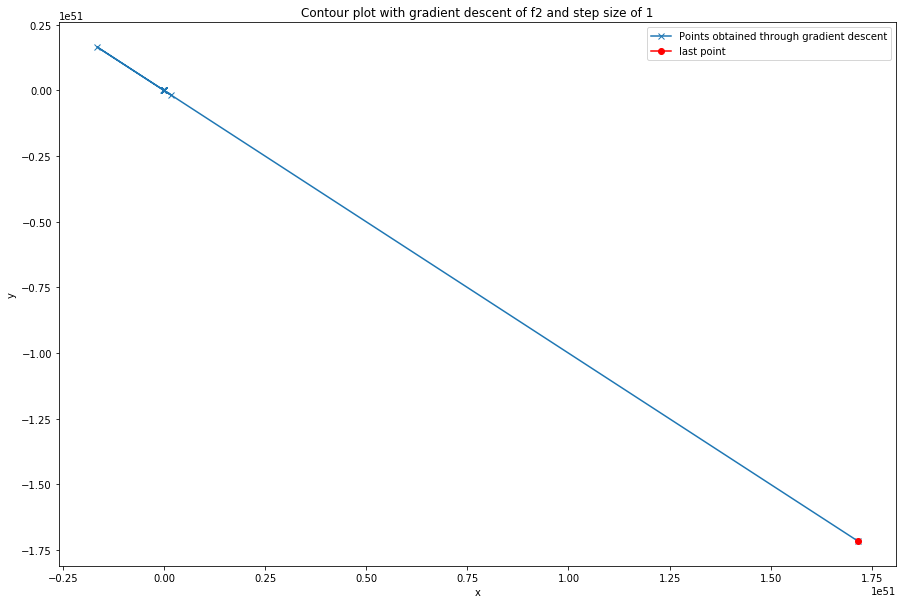

<IPython.core.display.Javascript object>

In [111]:
fig, ax = plt.subplots(figsize=(15, 10))
x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-0.25, 1.75, 100)
X1, X2 = np.meshgrid(x1, x2)

Z = [[[a, b] for a in x1] for b in x2]
results = np.asarray(
    list(map(lambda l: np.asarray(list(map(lambda v: np.double(f2(v)), l))), Z))
)
ax.plot(*zip(*gdsesc_2), marker="x", label="Points obtained through gradient descent")
ax.plot(last_point[0], last_point[1], marker="o", color="red", label="last point")


plt.contour(X1, X2, results, 50, colors="black")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title(
    f"Contour plot with gradient descent of f2 and step size of {learning_rate}"
)
ax.legend()
plt.savefig("./template/grad_f2_enorme")
plt.show()

In [114]:
st = [0.3, 0]
learning_rate = 1

gdsesc_3 = grad_desc(grad_f3, 50, st, learning_rate)
last_point = tuple(gdsesc_3[0].tolist()[0])
gdsesc_3 = list(map(lambda l: tuple(l.tolist()[0]), gdsesc_3[1]))

<IPython.core.display.Javascript object>

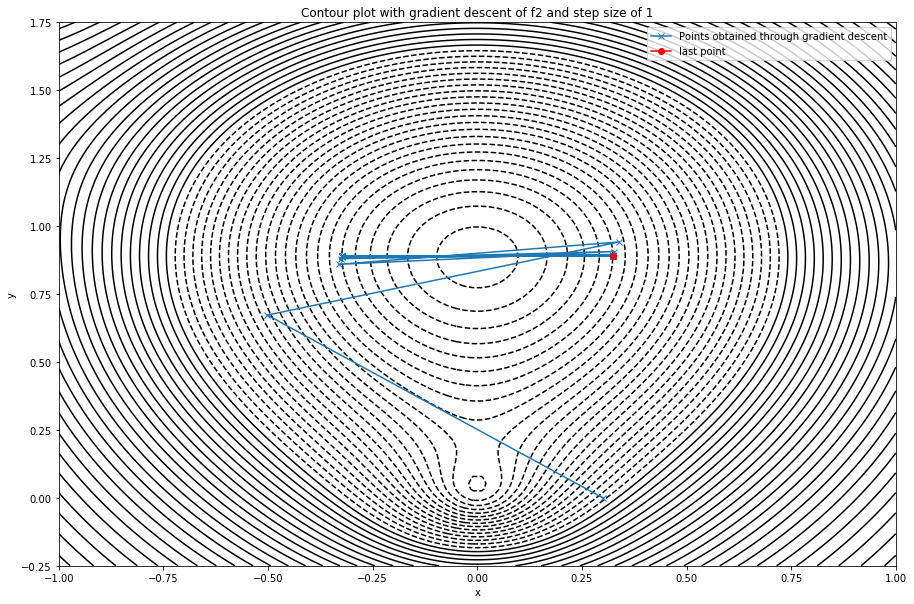

<IPython.core.display.Javascript object>

In [115]:
fig, ax = plt.subplots(figsize=(15, 10))
x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-0.25, 1.75, 100)
X1, X2 = np.meshgrid(x1, x2)

Z = [[[a, b] for a in x1] for b in x2]
results = np.asarray(
    list(map(lambda l: np.asarray(list(map(lambda v: np.double(f3(v)), l))), Z))
)
ax.plot(*zip(*gdsesc_3), marker="x", label="Points obtained through gradient descent")
ax.plot(last_point[0], last_point[1], marker="o", color="red", label="last point")

plt.contour(X1, X2, results, 50, colors="black")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title(
    f"Contour plot with gradient descent of f2 and step size of {learning_rate}"
)
ax.legend()
plt.savefig("./template/grad_f3_enorme")
plt.show()

As expected, the greater is the learning rate, the less precise it becomes. In the case it is grossly mispecified, the error is also bigger. And we can arrive to the case (of f2) where the last point of gradient descent has nothing to do with the minimum we expect. <br>
The same is valid with the f3, but it is less visibie, because of the negative exponential. 

In [116]:
st = [0.3, 0.8]
learning_rate = 0.07

gdsesc_3 = grad_desc(grad_f3, 50, st, learning_rate)
last_point = tuple(gdsesc_3[0].tolist()[0])
gdsesc_3 = list(map(lambda l: tuple(l.tolist()[0]), gdsesc_3[1]))

<IPython.core.display.Javascript object>

In [118]:
last_point

(6.644933856330661e-05, 0.8871094100907158)

<IPython.core.display.Javascript object>

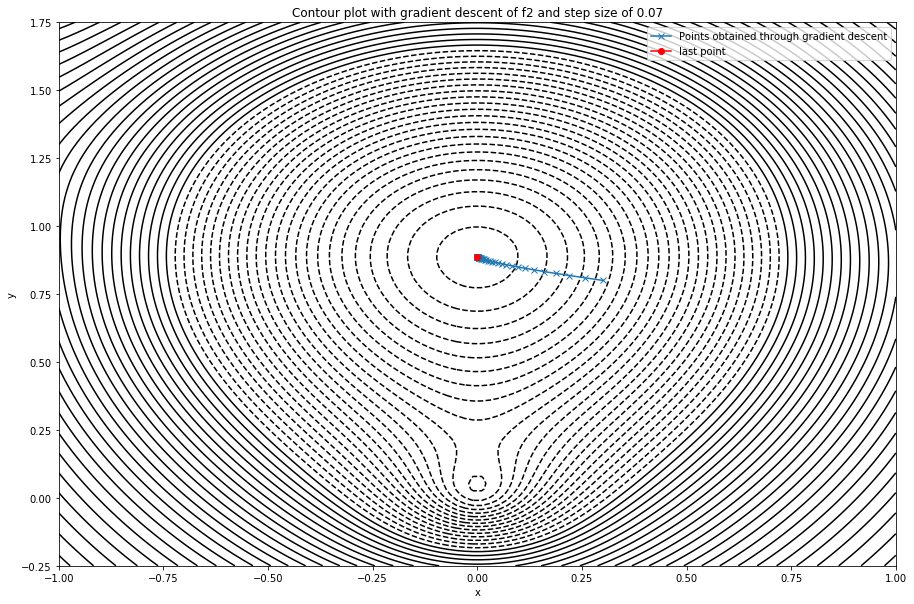

<IPython.core.display.Javascript object>

In [117]:
fig, ax = plt.subplots(figsize=(15, 10))
x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-0.25, 1.75, 100)
X1, X2 = np.meshgrid(x1, x2)

Z = [[[a, b] for a in x1] for b in x2]
results = np.asarray(
    list(map(lambda l: np.asarray(list(map(lambda v: np.double(f3(v)), l))), Z))
)
ax.plot(*zip(*gdsesc_3), marker="x", label="Points obtained through gradient descent")
ax.plot(last_point[0], last_point[1], marker="o", color="red", label="last point")

plt.contour(X1, X2, results, 50, colors="black")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title(
    f"Contour plot with gradient descent of f2 and step size of {learning_rate}"
)
ax.legend()
plt.savefig("./template/grad_f3_other_pos")
plt.show()